In [1]:
import numpy as np
from pandas import Series
import seaborn as sns
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import math
from pandas import Series
from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq

In [2]:
# Read Excel file and convert it to CSV
excel_file = '../../../Data_Thesis/CNS/Data/Excell_exports/GOM22SU_ST.7_HCL.XLS'
csv_file = '../../../Data_Thesis/CNS/Data/Areas/GOM22SU_ST.7_HCL_areas.csv'
df = pd.read_excel(excel_file)
df.to_csv(csv_file, index=False, header=False)

# Read CSV file and create a DataFrame
column_names = ['name', 'file', 'date', 'time', 'type', 'wtd', 'Unnamed_1', 'Unnamed_2', 'Unnamed_3','Unnamed_4', 'N_area', 'C_area', 'S_area']  # Replace with your desired column names
df = pd.read_csv(csv_file, names=column_names)

# Now you can work with the DataFrame
CAMP = "GOM22SU" 
STN = "St.7"
TREAT = "HCL"

Save_name = '../../../Data_Thesis/CNS/Data/GOM22SU_ST.7_HCL.csv'

In [3]:
df

name      file        date   time     type     wtd  \
0                  tin  DfchA002  06/28/2023  15:31    Blank     NaN   
0                  tin  DfchA003  06/28/2023  15:43    Blank     NaN   
0                  tin  DfchA004  06/28/2023  15:55    Blank     NaN   
0                  tin  DfchA005  06/28/2023  16:07    Blank     NaN   
0                  tin  DfchA006  06/28/2023  16:19    Blank     NaN   
0                  tin  DfchA007  06/28/2023  16:31    Blank     NaN   
0                  tin  DfchA008  06/28/2023  16:43    Blank     NaN   
0                  tin  DfchA009  06/28/2023  16:55  By-Pass     NaN   
0              STD_LOW  DfchA010  06/28/2023  17:07      STD   1.094   
0              STD_MED  DfchA011  06/28/2023  17:19      STD   3.650   
0             STD_HIGH  DfchA012  06/28/2023  17:32      STD   5.767   
0                  tin  DfchA013  06/28/2023  17:44    Blank     NaN   
0                  tin  DfchA014  06/28/2023  17:56    Blank     NaN   
0                  tin  DfchA015  06/28/2023  18:08    Blank     NaN   
0                  tin  DfchA016  06/28/2023  18:20    Blank     NaN   
0                  tin  DfchA017  06/28/2023  18:32    Blank     NaN   
0                  tin  DfchA018  06/28/2023  18:44  By-Pass     NaN   
0  ST7_JULY2022_HCL_01  DfchA019  06/28/2023  18:56      UNK   9.969   
0  ST7_JULY2022_HCL_02  DfchA020  06/28/2023  19:08      UNK   7.945   
0  ST7_JULY2022_HCL_03  DfchA021  06/28/2023  19:20      UNK  11.629   
0  ST7_JULY2022_HCL_04  DfchA022  06/28/2023  19:32      UNK  10.004   
0  ST7_JULY2022_HCL_05  DfchA023  06/28/2023  19:44      UNK  16.068   
0  ST7_JULY2022_HCL_06  DfchA024  06/28/2023  19:57      UNK  13.575   
0  ST7_JULY2022_HCL_07  DfchA025  06/28/2023  20:09      UNK  11.033   
0  ST7_JULY2022_HCL_08  DfchA026  06/28/2023  20:21      UNK  12.688   
0  ST7_JULY2022_HCL_09  DfchA027  06/28/2023  20:33      UNK  11.473   
0  ST7_JULY2022_HCL_10  DfchA028  06/28/2023  20:45      UNK  11.762   
0  ST7_JULY2022_HCL_11  DfchA029  06/28/2023  20:57      UNK  12.471   
0  ST7_JULY2022_HCL_12  DfchA030  06/28/2023  21:09      UNK  11.682   
0  ST7_JULY2022_HCL_13  DfchA031  06/28/2023  21:21      UNK  11.801   
0  ST7_JULY2022_HCL_14  DfchA032  06/28/2023  21:33      UNK  10.449   
0  ST7_JULY2022_HCL_15  DfchA033  06/28/2023  21:45      UNK  10.039   
0  ST7_JULY2022_HCL_17  DfchA034  06/28/2023  21:57      UNK  12.236   
0  ST7_JULY2022_HCL_19  DfchA035  06/28/2023  22:09      UNK  16.778   
0  ST7_JULY2022_HCL_21  DfchA036  06/28/2023  22:21      UNK  11.598   
0  ST7_JULY2022_HCL_22  DfchA037  06/28/2023  22:34      UNK  13.468   
0  ST7_JULY2022_HCL_23  DfchA038  06/28/2023  22:46      UNK  13.008   
0  ST7_JULY2022_HCL_24  DfchA039  06/28/2023  22:58      UNK  15.084   
0                  tin  DfchA040  06/28/2023  23:10    Blank     NaN   
0                  tin  DfchA041  06/28/2023  23:22    Blank     NaN   
0                  tin  DfchA042  06/28/2023  23:34    Blank     NaN   
0                  tin  DfchA043  06/28/2023  23:46  By-Pass     NaN   
0                 CS_1  DfchA044  06/28/2023  23:58      UNK   2.241   
0                 CS_2  DfchA045  06/29/2023  00:10      UNK   1.933   
0                  tin  DfchA046  06/29/2023  00:22    Blank     NaN   
0                  tin  DfchA047  06/29/2023  00:34    Blank     NaN   
0                  tin  DfchA048  06/29/2023  00:46    Blank     NaN   
0                  tin  DfchA049  06/29/2023  00:58    Blank     NaN   
0                  tin  DfchA050  06/29/2023  01:10    Blank     NaN   
0                  tin  DfchA051  06/29/2023  01:23    Blank     NaN   
0                  tin  DfchA052  06/29/2023  01:35    Blank     NaN   
0                  tin  DfchA053  06/29/2023  01:47    Blank     NaN   
0                  tin  DfchA054  06/29/2023  01:59    Blank     NaN   

   Unnamed_1  Unnamed_2  Unnamed_3  Unnamed_4        N_area        C_area  \
0        NaN        NaN        NaN        NaN  0.000

In [4]:
# Calculate mean for rows where type is blank
blank_rows = df[df['type'] == 'Blank']
mean_values = blank_rows[['C_area', 'N_area', 'S_area']].mean()

# Subtract mean from respective columns and create new rows
df['N_area_bl'] = df['N_area']# - mean_values['N_area']
df['C_area_bl'] = df['C_area']# - mean_values['C_area']
df['S_area_bl'] = df['S_area']# - mean_values['S_area']

In [5]:
# Calculate C N S wights 
std = df[df['type'] == 'STD']

# Subtract mean from respective columns and create new rows
std['N_wtd'] = std['wtd'] * .0652
std['C_wtd'] = std['wtd'] * .725
std['S_wtd'] = std['wtd'] * .0746

std

C:\Users\12532\AppData\Local\Temp\ipykernel_11032\2823902847.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std['N_wtd'] = std['wtd'] * .0652
C:\Users\12532\AppData\Local\Temp\ipykernel_11032\2823902847.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std['C_wtd'] = std['wtd'] * .725
C:\Users\12532\AppData\Local\Temp\ipykernel_11032\2823902847.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

name      file        date   time type    wtd  Unnamed_1  Unnamed_2  \
0   STD_LOW  DfchA010  06/28/2023  17:07  STD  1.094       6.25        0.0   
0   STD_MED  DfchA011  06/28/2023  17:19  STD  3.650       6.25        0.0   
0  STD_HIGH  DfchA012  06/28/2023  17:32  STD  5.767       6.25        0.0   

   Unnamed_3  Unnamed_4       N_area      C_area    S_area    N_area_bl  \
0        NaN        NaN   184289.375   4438154.0  116075.0   184289.375   
0        NaN        NaN   702641.500  14630379.0  471670.0   702641.500   
0        NaN        NaN  1100822.500  23029346.0  806978.5  1100822.500   

    C_area_bl  S_area_bl     N_wtd     C_wtd     S_wtd  
0   4438154.0   116075.0  0.071329  0.793150  0.081612  
0  14630379.0   471670.0  0.237980  2.646250  0.272290  
0  23029346.0   806978.5  0.376008  4.181075  0.430218

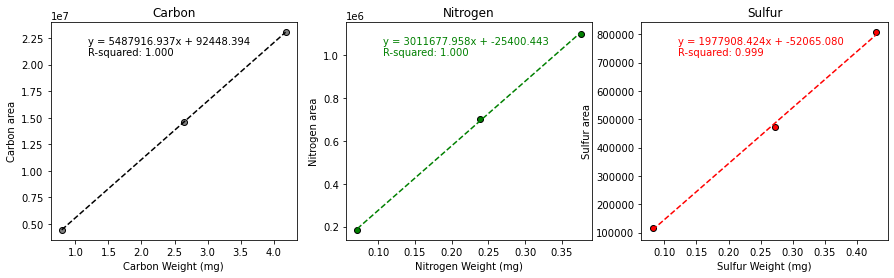

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Scatter plot and linear regression for C_wtd vs C_area
ax = axes[0]
ax.scatter(std['C_wtd'], std['C_area_bl'], facecolor='grey', edgecolor='black')
x = std['C_wtd']
y = std['C_area_bl']
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
line = np.poly1d(coefficients)
ax.plot(x, line(x), color='black', linestyle='--')
residuals = y - line(x)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
ax.set_xlabel('Carbon Weight (mg)')
ax.set_ylabel('Carbon area')
ax.set_title('Carbon')
equation = f"y = {slope:.3f}x + {coefficients[1]:.3f}"
r2_text = f"R-squared: {r_squared:.3f}"
ax.text(0.15, 0.90, equation, transform=ax.transAxes, fontsize=10, color='black')
ax.text(0.15, 0.85, r2_text, transform=ax.transAxes, fontsize=10, color='black')

# Scatter plot and linear regression for N_wtd vs N_area
ax = axes[1]
ax.scatter(std['N_wtd'], std['N_area_bl'], facecolor='green', edgecolor='black')
x = std['N_wtd']
y = std['N_area_bl']
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
line = np.poly1d(coefficients)
ax.plot(x, line(x), color='green', linestyle='--')
residuals = y - line(x)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
ax.set_xlabel('Nitrogen Weight (mg)')
ax.set_ylabel('Nitrogen area')
ax.set_title('Nitrogen')
equation = f"y = {slope:.3f}x + {coefficients[1]:.3f}"
r2_text = f"R-squared: {r_squared:.3f}"
ax.text(0.15, 0.90, equation, transform=ax.transAxes, fontsize=10, color='green')
ax.text(0.15, 0.85, r2_text, transform=ax.transAxes, fontsize=10, color='green')

# Scatter plot and linear regression for S_wtd vs S_area
ax = axes[2]
ax.scatter(std['S_wtd'], std['S_area_bl'], facecolor='red', edgecolor='black')
x = std['S_wtd']
y = std['S_area_bl']
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
line = np.poly1d(coefficients)
ax.plot(x, line(x), color='red', linestyle='--')
residuals = y - line(x)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
ax.set_xlabel('Sulfur Weight (mg)')
ax.set_ylabel('Sulfur area')
ax.set_title('Sulfur')
equation = f"y = {slope:.3f}x + {coefficients[1]:.3f}"
r2_text = f"R-squared: {r_squared:.3f}"
ax.text(0.15, 0.90, equation, transform=ax.transAxes, fontsize=10, color='red')
ax.text(0.15, 0.85, r2_text, transform=ax.transAxes, fontsize=10, color='red')

# show plot
plt.show()

In [7]:
y = std['C_wtd']
x = std['C_area_bl']
C_coefficients = np.polyfit(x, y, 1)
C_slope = C_coefficients[0]

y = std['N_wtd']
x = std['N_area_bl']
N_coefficients = np.polyfit(x, y, 1)
N_slope = N_coefficients[0]

y = std['S_wtd']
x = std['S_area_bl']
S_coefficients = np.polyfit(x, y, 1)
S_slope = S_coefficients[0]

print(f"SLOPE")
print(f"Carbon slope:   {C_slope}")
print(f"Nitrogen slope: {N_slope}")
print(f"Sulfur slope:   {S_slope}")
print(f"")

# Subtract mean from respective columns and create new rows
df['N_wtd'] = df['N_area_bl'] * N_slope
df['C_wtd'] = df['C_area_bl'] * C_slope
df['S_wtd'] = df['S_area_bl'] * S_slope

# Subtract mean from respective columns and create new rows
df['N%'] = df['N_wtd'] / df['wtd'] *100
df['C%'] = df['C_wtd'] / df['wtd'] *100
df['S%'] = df['S_wtd'] / df['wtd'] *100

cs = df[df['name'].str.contains('CS')]
cs['cs_N%'] = cs['N%']/.0652
cs['cs_C%'] = cs['C%']/.725
cs['cs_S%'] = cs['S%']/.0746

print(f"Check Standerd % est")
print('Nitrogen')
print(cs['cs_N%'])
print('Carbon')
print(cs['cs_C%'])
print('Sulfer')
print(cs['cs_S%'])


SLOPE
Carbon slope:   1.8221811998158715e-07
Nitrogen slope: 3.3188920652468823e-07
Sulfur slope:   5.048839473136508e-07

Check Standerd % est
Nitrogen
0    97.879284
0    94.269868
Name: cs_N%, dtype: float64
Carbon
0    102.294324
0    102.258610
Name: cs_C%, dtype: float64
Sulfer
0    56.975685
0    52.116888
Name: cs_S%, dtype: float64


C:\Users\12532\AppData\Local\Temp\ipykernel_11032\3713983456.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs['cs_N%'] = cs['N%']/.0652
C:\Users\12532\AppData\Local\Temp\ipykernel_11032\3713983456.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs['cs_C%'] = cs['C%']/.725
C:\Users\12532\AppData\Local\Temp\ipykernel_11032\3713983456.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [8]:
df

name      file        date   time     type     wtd  \
0                  tin  DfchA002  06/28/2023  15:31    Blank     NaN   
0                  tin  DfchA003  06/28/2023  15:43    Blank     NaN   
0                  tin  DfchA004  06/28/2023  15:55    Blank     NaN   
0                  tin  DfchA005  06/28/2023  16:07    Blank     NaN   
0                  tin  DfchA006  06/28/2023  16:19    Blank     NaN   
0                  tin  DfchA007  06/28/2023  16:31    Blank     NaN   
0                  tin  DfchA008  06/28/2023  16:43    Blank     NaN   
0                  tin  DfchA009  06/28/2023  16:55  By-Pass     NaN   
0              STD_LOW  DfchA010  06/28/2023  17:07      STD   1.094   
0              STD_MED  DfchA011  06/28/2023  17:19      STD   3.650   
0             STD_HIGH  DfchA012  06/28/2023  17:32      STD   5.767   
0                  tin  DfchA013  06/28/2023  17:44    Blank     NaN   
0                  tin  DfchA014  06/28/2023  17:56    Blank     NaN   
0                  tin  DfchA015  06/28/2023  18:08    Blank     NaN   
0                  tin  DfchA016  06/28/2023  18:20    Blank     NaN   
0                  tin  DfchA017  06/28/2023  18:32    Blank     NaN   
0                  tin  DfchA018  06/28/2023  18:44  By-Pass     NaN   
0  ST7_JULY2022_HCL_01  DfchA019  06/28/2023  18:56      UNK   9.969   
0  ST7_JULY2022_HCL_02  DfchA020  06/28/2023  19:08      UNK   7.945   
0  ST7_JULY2022_HCL_03  DfchA021  06/28/2023  19:20      UNK  11.629   
0  ST7_JULY2022_HCL_04  DfchA022  06/28/2023  19:32      UNK  10.004   
0  ST7_JULY2022_HCL_05  DfchA023  06/28/2023  19:44      UNK  16.068   
0  ST7_JULY2022_HCL_06  DfchA024  06/28/2023  19:57      UNK  13.575   
0  ST7_JULY2022_HCL_07  DfchA025  06/28/2023  20:09      UNK  11.033   
0  ST7_JULY2022_HCL_08  DfchA026  06/28/2023  20:21      UNK  12.688   
0  ST7_JULY2022_HCL_09  DfchA027  06/28/2023  20:33      UNK  11.473   
0  ST7_JULY2022_HCL_10  DfchA028  06/28/2023  20:45      UNK  11.762   
0  ST7_JULY2022_HCL_11  DfchA029  06/28/2023  20:57      UNK  12.471   
0  ST7_JULY2022_HCL_12  DfchA030  06/28/2023  21:09      UNK  11.682   
0  ST7_JULY2022_HCL_13  DfchA031  06/28/2023  21:21      UNK  11.801   
0  ST7_JULY2022_HCL_14  DfchA032  06/28/2023  21:33      UNK  10.449   
0  ST7_JULY2022_HCL_15  DfchA033  06/28/2023  21:45      UNK  10.039   
0  ST7_JULY2022_HCL_17  DfchA034  06/28/2023  21:57      UNK  12.236   
0  ST7_JULY2022_HCL_19  DfchA035  06/28/2023  22:09      UNK  16.778   
0  ST7_JULY2022_HCL_21  DfchA036  06/28/2023  22:21      UNK  11.598   
0  ST7_JULY2022_HCL_22  DfchA037  06/28/2023  22:34      UNK  13.468   
0  ST7_JULY2022_HCL_23  DfchA038  06/28/2023  22:46      UNK  13.008   
0  ST7_JULY2022_HCL_24  DfchA039  06/28/2023  22:58      UNK  15.084   
0                  tin  DfchA040  06/28/2023  23:10    Blank     NaN   
0                  tin  DfchA041  06/28/2023  23:22    Blank     NaN   
0                  tin  DfchA042  06/28/2023  23:34    Blank     NaN   
0                  tin  DfchA043  06/28/2023  23:46  By-Pass     NaN   
0                 CS_1  DfchA044  06/28/2023  23:58      UNK   2.241   
0                 CS_2  DfchA045  06/29/2023  00:10      UNK   1.933   
0                  tin  DfchA046  06/29/2023  00:22    Blank     NaN   
0                  tin  DfchA047  06/29/2023  00:34    Blank     NaN   
0                  tin  DfchA048  06/29/2023  00:46    Blank     NaN   
0                  tin  DfchA049  06/29/2023  00:58    Blank     NaN   
0                  tin  DfchA050  06/29/2023  01:10    Blank     NaN   
0                  tin  DfchA051  06/29/2023  01:23    Blank     NaN   
0                  tin  DfchA052  06/29/2023  01:35    Blank     NaN   
0                  tin  DfchA053  06/29/2023  01:47    Blank     NaN   
0                  tin  DfchA054  06/29/2023  01:59    Blank     NaN   

   Unnamed_1  Unnamed_2  Unnamed_3  Unnamed_4  ...    S_area     N_area_bl  \
0        NaN        NaN        NaN        NaN  ... 

In [9]:
ds = df[df['name'].str.contains('ST7')]
ds['ID'] = ds['name'].str[-2:]
ds['Treat'] = CAMP
ds['Camp'] = TREAT
ds['Station'] = STN
ds['notes'] = "N PEAKS BAD, S HAD NO PEAKS"

selected_columns = ['ID', 'Treat', 'Camp', 'Station', 'N%', 'C%', 'S%', 'notes']
ds = ds[selected_columns]

ds.to_csv(Save_name, index=False, header=True)
ds

C:\Users\12532\AppData\Local\Temp\ipykernel_11032\2444512143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['ID'] = ds['name'].str[-2:]
C:\Users\12532\AppData\Local\Temp\ipykernel_11032\2444512143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Treat'] = CAMP
C:\Users\12532\AppData\Local\Temp\ipykernel_11032\2444512143.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

ID    Treat Camp Station        N%        C%        S%  \
0  01  GOM22SU  HCL    St.7  0.105963  0.114949  0.028220   
0  02  GOM22SU  HCL    St.7  0.144624  1.260976  0.000000   
0  03  GOM22SU  HCL    St.7  0.167988  1.494091  0.090557   
0  04  GOM22SU  HCL    St.7  0.147865  1.244126  0.000000   
0  05  GOM22SU  HCL    St.7  0.145227  1.156902  0.000000   
0  06  GOM22SU  HCL    St.7  0.147233  1.258449  0.000000   
0  07  GOM22SU  HCL    St.7  0.137890  1.166354  0.000000   
0  08  GOM22SU  HCL    St.7  0.159112  1.288809  0.000000   
0  09  GOM22SU  HCL    St.7  0.159363  1.234557  0.000000   
0  10  GOM22SU  HCL    St.7  0.147191  1.145985  0.120718   
0  11  GOM22SU  HCL    St.7  0.130601  1.136760  0.153941   
0  12  GOM22SU  HCL    St.7  0.103090  0.939463  0.166903   
0  13  GOM22SU  HCL    St.7  0.119779  1.053441  0.075482   
0  14  GOM22SU  HCL    St.7  0.109858  1.153305  0.079301   
0  15  GOM22SU  HCL    St.7  0.089572  1.058107  0.000000   
0  17  GOM22SU  HCL    St.7  0.000000  1.043432  0.000000   
0  19  GOM22SU  HCL    St.7  0.000000  1.170843  0.000000   
0  21  GOM22SU  HCL    St.7  0.000000  0.864490  0.000000   
0  22  GOM22SU  HCL    St.7  0.000000  0.483599  0.000000   
0  23  GOM22SU  HCL    St.7  0.000000  0.483405  0.000000   
0  24  GOM22SU  HCL    St.7  0.000000  0.443184  0.000000   

                         notes  
0  N PEAKS BAD, S HAD NO PEAKS  
0  N PEAKS BAD, S HAD NO PEAKS  
0  N PEAKS BAD, S HAD NO PEAKS  
0  N PEAKS BAD, S HAD NO PEAKS  
0  N PEAKS BAD, S HAD NO PEAKS  
0  N PEAKS BAD, S HAD NO PEAKS  
0  N PEAKS BAD, S HAD NO PEAKS  
0  N PEAKS BAD, S HAD NO PEAKS  
0  N PEAKS BAD, S HAD NO PEAKS  
0  N PEAKS BAD, S HAD NO PEAKS  
0  N PEAKS BAD, S HAD NO PEAKS  
0  N PEAKS BAD, S HAD NO PEAKS  
0  N PEAKS BAD, S HAD NO PEAKS  
0  N PEAKS BAD, S HAD NO PEAKS  
0  N PEAKS BAD, S HAD NO PEAKS  
0  N PEAKS BAD, S HAD NO PEAKS  
0  N PEAKS BAD, S HAD NO PEAKS  
0  N PEAKS BAD, S HAD NO PEAKS  
0  N PEAKS BAD, S HAD NO PEAKS  
0  N PEAKS BAD, S HAD NO PEAKS  
0  N PEAKS BAD, S HAD NO PEAKS